<a href="https://colab.research.google.com/github/Mcclearyjeremy94/Project-1/blob/main/Project_2_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
set_config(display='diagram')


In [3]:
path = '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'
df= pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#make a copy of the original data to not ruin any of the original data
ml_df= df.copy()

In [5]:
ml_df.info()
#from this list I think I can take out the columns: 'id', 'gender', 'ever_married', 'work_type', and also the 'Residence_type'.
#they do not contain any substantial data I feel that will affect determining if the patient will have a stroke or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
ml_df.drop(columns= ['id','gender','ever_married','work_type','Residence_type'], inplace=True)
ml_df.info()
#these 6 columns seem to be the only columns that actually have any information that would pertain to the actual target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                4909 non-null   float64
 5   smoking_status     5110 non-null   object 
 6   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 279.6+ KB


In [7]:
#lets now check for duplicates
ml_df.duplicated().sum()
#there are no duplicates in the data which is good

0

In [8]:
#lets check for missing values
ml_df.isna().sum()
#we will be able to fix that using a mean imputer later

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
mean_imputer= SimpleImputer(strategy= 'mean')
num_selector= make_column_selector(dtype_include='number')
num_columns=num_selector(ml_df)

In [10]:
ml_df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [11]:
#checking for any inconsitencies indata
ml_df['age'].dtype
#lets change these all of these to intergers and not floats
ml_df['age']= ml_df['age'].astype(int)
#lets now check if that is correct
ml_df['age'].dtype
#that looks better now

dtype('int64')

In [12]:
#lets check for outliers in the rest of the data
#after doing multiple checks it seems that there are no outliers in the data as well

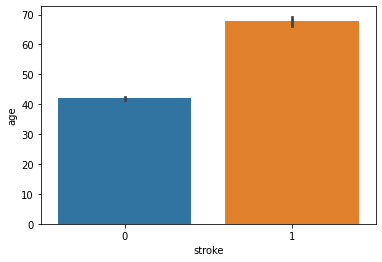

In [13]:
ax_age = sns.barplot(data = ml_df, x = 'stroke', y = 'age')
ax_age

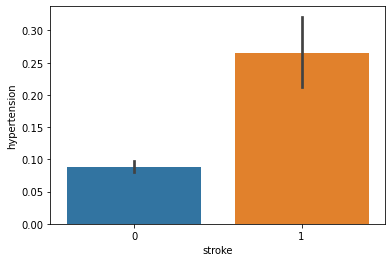

In [14]:
ax_hypertension= sns.barplot(data= ml_df, x='stroke', y='hypertension')
ax_hypertension

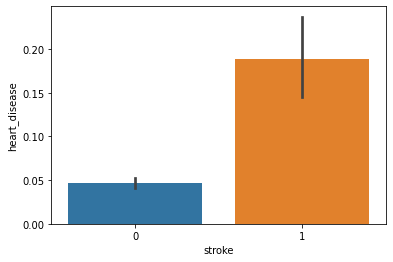

In [15]:
ax_heart_disease= sns.barplot(data= ml_df, x='stroke', y='heart_disease')
ax_heart_disease;

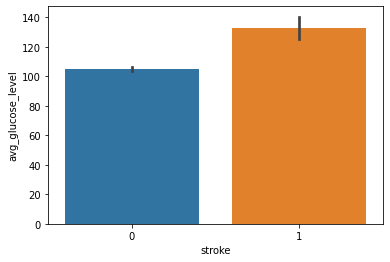

In [16]:
ax_glucose_level= sns.barplot(data= ml_df, x='stroke', y='avg_glucose_level')
ax_glucose_level;

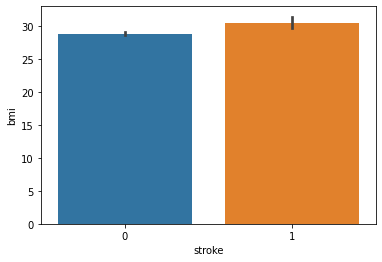

In [17]:
ax_bmi= sns.barplot(data= ml_df, x='stroke', y='bmi')
ax_bmi;

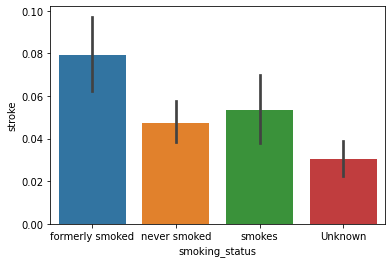

In [18]:
ax_smoking_status= sns.barplot(data= ml_df, x='smoking_status', y='stroke')
ax_smoking_status;

#I decided when cleaning the data to remove the,'id','gender','ever_married','work_type','Residence_type', columns from the data seeing as they didnt specifically pertain to the actual target itself(stroke or not having a stroke).

#I will now split the data to figure out future results on if the persons will be more or less likely to have a stroke


In [20]:
X= ml_df.drop(columns='stroke')
y= ml_df['stroke']
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [21]:
num_selector= make_column_selector(dtype_include='number')
cat_selector= make_column_selector(dtype_include='object')

In [22]:
cat_selector(X_train)

['smoking_status']

In [24]:
#I will now change the smoking status to numbers to have it all be numerical data
X_train['smoking_status'].value_counts()

never smoked       1424
Unknown            1146
formerly smoked     673
smokes              589
Name: smoking_status, dtype: int64

In [25]:
X_train['smoking_status']= X_train['smoking_status'].replace('never smoked', 0)
X_train['smoking_status']= X_train['smoking_status'].replace('Unknown', 1)
X_train['smoking_status']= X_train['smoking_status'].replace('formerly smoked',2)
X_train['smoking_status']= X_train['smoking_status'].replace('smokes',3)
X_train['smoking_status'].value_counts()
#We can now work with this data now that all of our data is numeric values

0    1424
1    1146
2     673
3     589
Name: smoking_status, dtype: int64

In [28]:
#I will now use a mean imputer and scaler to go ahead and fit that onto the missing 'bmi' data
mean_imputer= SimpleImputer(strategy='mean')
scaler= StandardScaler()



In [34]:
numeric_pipe= make_pipeline(mean_imputer,scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [35]:
number_tuple= (numeric_pipe, num_selector)
preprocessor= make_column_transformer(number_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe1f1fbd790>)])

In [36]:
#I will now fit the preprocessor onto the training data and the testing data
preprocessor.fit(X_train)
preprocessor.fit(X_test)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe1f1fbd790>)])

In [37]:
#I will now make new variable names for both the training and testing data to get the most accurate results when running it through multiple models.
X_train_processed= preprocessor.transform(X_train)
X_test_processed= preprocessor.transform(X_test)

In [38]:
#Now checking if the transformed data is correct and there are no missing values in the data after the split.
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')

0 missing values in training data
0 missing values in testing data


In [39]:
#First using a logistic regression model to see the results
logreg= LogisticRegression()
scaler= StandardScaler()
logreg_pipe= make_pipeline(scaler, logreg)
#training the model on the data, storing the information learned from the data
#model is learning the relationship between X and y
logreg_pipe.fit(X_train_processed, y_train)
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

0.9558977035490606
0.9374021909233177


#Lets now hypertune the parameters on the Logistic Regression model and see which score would work best, using the l1 and l2 penalty.

In [40]:
#create a list of c values and empty list for scores
c_values= [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores= []
test_scores= []
#iterate over the c values
for c in c_values:
  #instantiate a model with each value of c and fit it on the data
  log_reg= LogisticRegression(C=c, max_iter=1000, solver='liblinear',penalty='l1')
  log_reg_pipe= make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
  #add the training and testing scores to our lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
{c:score for c, score in zip(c_values, test_scores)}
#l1 penalty

{0.0001: 0.9374021909233177,
 0.001: 0.9374021909233177,
 0.01: 0.9374021909233177,
 0.1: 0.9374021909233177,
 1: 0.9374021909233177,
 10: 0.9374021909233177,
 100: 0.9374021909233177,
 1000: 0.9374021909233177}

In [60]:
#create a list of c values and empty list for scores
c_values= [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores= []
test_scores= []
#iterate over the c values
for c in c_values:
  #instantiate a model with each value of c and fit it on the data
  log_reg= LogisticRegression(C=c, max_iter=1000, solver='liblinear',penalty='l2')
  log_reg_pipe= make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
  #add the training and testing scores to our lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.9374021909233177,
 0.001: 0.9374021909233177,
 0.01: 0.9374021909233177,
 0.1: 0.9374021909233177,
 1: 0.9374021909233177,
 10: 0.9374021909233177,
 100: 0.9374021909233177,
 1000: 0.9374021909233177}

#It looks like we get the same score no matter which penalty we use on the Logistic Regression model. Lets try out a KNN model and see how the two differentiate. 

In [42]:
#KNNeighbors classifier, we will start with the n_neighbors value as 1 for the default. We will then tune this later.
knn= KNeighborsClassifier(n_neighbors=1)
knn_pipe= make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [43]:
print(knn_pipe.score(X_train_processed, y_train))
print(knn_pipe.score(X_test_processed, y_test))
#This is actually a great score, but lets see what will happen with the scores when they are tuned.

1.0
0.9162754303599374


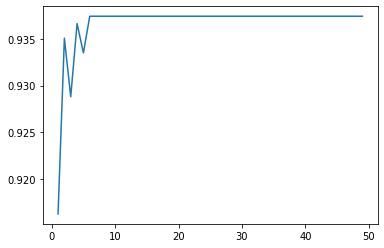

Best K value is 6 
with 0.9374021909233177 accuracy on the test set


In [44]:
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  knn= KNeighborsClassifier(n_neighbors=k)
  knn_pipe= make_pipeline(scaler, knn)
  knn_pipe.fit(X_train_processed, y_train)
  acc = accuracy_score(y_test, knn_pipe.predict(X_test_processed))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')
#It looks like the best score was a 6, even better than the default 1 score, which was also very good as well.
#Lets now change that to our default knn, for when we use it in future data

In [45]:
knn= KNeighborsClassifier(n_neighbors=6)
knn_pipe= make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=6))])

In [46]:
print(knn_pipe.score(X_train_processed, y_train))
print(knn_pipe.score(X_test_processed, y_test))
#That is the same score we got for the logistic regression model. Which means you could use either model deciding on ones preference.
#Personally I like the KNN model due to not having to use as much code and it looks better. 

0.9558977035490606
0.9374021909233177


#Lets now see what will happen when we use PCA in both the models

In [53]:
#knn and pca method
pca = PCA()
pipeline_pca_knn= make_pipeline(scaler,pca,knn)

In [54]:
pipeline_pca_knn.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=6))])

In [55]:
print(pipeline_pca_knn.score(X_train_processed, y_train))
print(pipeline_pca_knn.score(X_test_processed, y_test))
#It seems that even fitting a pca onto the data shows that I am still getting the same results no matter what. Which is nice cause it means I am getting consistency from the each model.

0.9558977035490606
0.9374021909233177


In [56]:
#Lets now see if a pca with logistic regression will maybe change the scores here.
logreg_pipe_pca= make_pipeline(scaler,pca,logreg)

In [57]:
logreg_pipe_pca.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('logisticregression', LogisticRegression())])

In [58]:
print(logreg_pipe_pca.score(X_train_processed, y_train))
print(logreg_pipe_pca.score(X_test_processed, y_test))
#It still seems no matter what I am doing no matter which model I will still manage to get the same results. Which the results are great.

0.9558977035490606
0.9374021909233177


#I will use the magic cell to check the time it takes for each model and decide using which one is the fastest to determine which model would be suited best. Since this will be a model used for predicting future data and hundreds and thousands of new features will be added to the data.

In [61]:
%%time
#pca logistic regression time
(logreg_pipe_pca.score(X_test_processed, y_test))

CPU times: user 3.55 ms, sys: 0 ns, total: 3.55 ms
Wall time: 4.61 ms


0.9374021909233177

In [62]:
%%time 
#pca knn time
(pipeline_pca_knn.score(X_test_processed, y_test))

CPU times: user 71.8 ms, sys: 0 ns, total: 71.8 ms
Wall time: 84.1 ms


0.9374021909233177

In [63]:
%%time
#knn time
(knn_pipe.score(X_test_processed, y_test))

CPU times: user 94.7 ms, sys: 0 ns, total: 94.7 ms
Wall time: 111 ms


0.9374021909233177

In [64]:
%%time
#logistic regression time
(logreg_pipe.score(X_test_processed, y_test))

CPU times: user 1.67 ms, sys: 53 µs, total: 1.72 ms
Wall time: 5.67 ms


0.9374021909233177

#So it seems as if the logistic regression model has the fastest time but not by a lot as compared to all the other models. So personally I would now go with the pca knn model. Its not a huge difference between all the other models and personally I like the look of the knn model the most compared to the others.